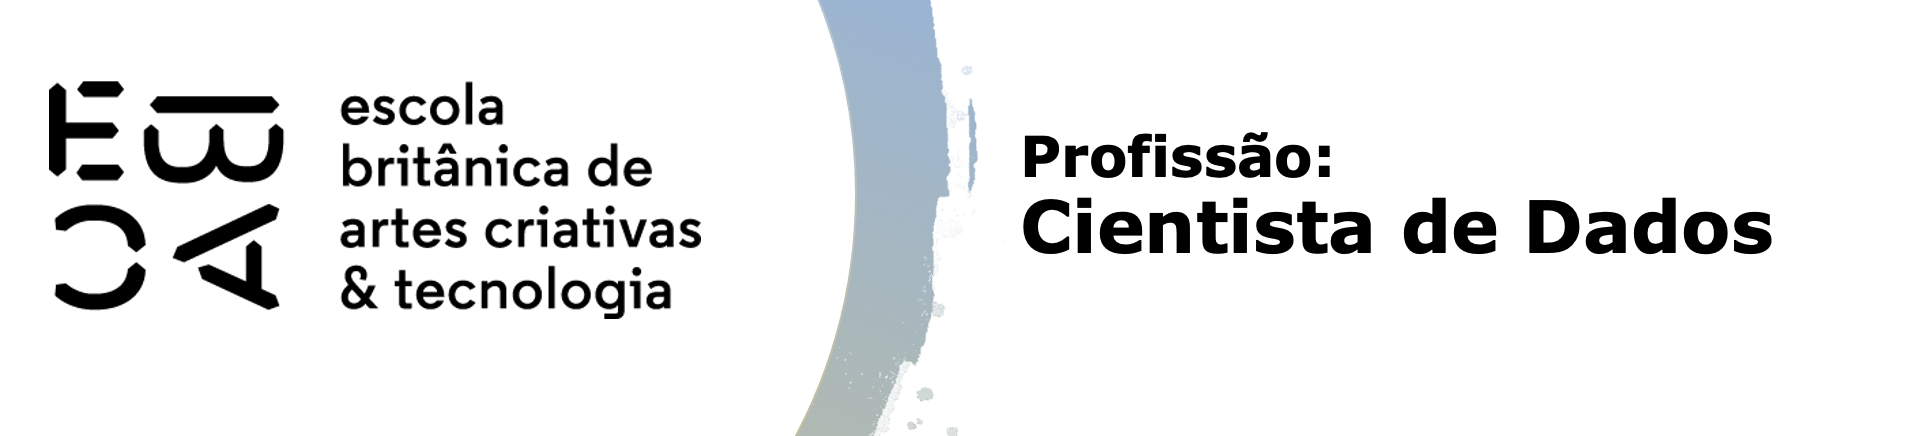
# Módulo 22 - Descritiva III - Gráficos interativos

# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 0. Carregamento dos pacotes necessários
Os pacotes utilizados nesta atividade são:
- yfinance, para obtenção de dados do yahoo finance; 
- plotly.express, para a produção de gráficos de linhas;
- pandas, para a montagem e análise de tabelas.

In [3]:
import yfinance as yfin
import plotly.express as px
import pandas as pd

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

Vamos analisar a variação dos valores de três ativos antes e depois da pandemia, ou seja, entre o começo de 2019 (01/01/2019) e o dia em que esta tarefa foi realizada (04/12/2023). Os três ativos em questão são:
- NFLX - Netlix, Inc.
- META - Meta Plattforms, Inc.
- AMZN - Amazon.com, Inc.

In [6]:
%%time 

# Parâmetros dos ativos - nome, data inicial e data final
ativos = ['NFLX', 'META', 'AMZN']
dt_ini = '2019-01-01'
dt_fin = '2023-12-04'

# Download dos ativos 
yf = yfin.download(ativos, start=dt_ini, end=dt_fin)

# Visualização dos dados
yf.head()

[*********************100%%**********************]  3 of 3 completed
Wall time: 77.1 ms


Adj Close                              Close              \
                 AMZN        META        NFLX       AMZN        META   
Date                                                                   
2019-01-02  76.956497  135.679993  267.660004  76.956497  135.679993   
2019-01-03  75.014000  131.740005  271.200012  75.014000  131.740005   
2019-01-04  78.769501  137.949997  297.570007  78.769501  137.949997   
2019-01-07  81.475502  138.050003  315.339996  81.475502  138.050003   
2019-01-08  82.829002  142.529999  320.269989  82.829002  142.529999   

                             High                                Low  \
                  NFLX       AMZN        META        NFLX       AMZN   
Date                                                                   
2019-01-02  267.660004  77.667999  137.509995  269.750000  73.046501   
2019-01-03  271.200012  76.900002  137.169998  275.790009  74.855499   
2019-01-04  297.570007  79.699997  138.000000  297.799988  75.915497   
2019-01-07  315.339996  81.727997  138.869995  316.799988  79.459503   
2019-01-08  320.269989  83.830498  143.139999  320.589996  80.830498   

                                         Open                          \
                  META        NFLX       AMZN        META        NFLX   
Date                                                                    
2019-01-02  128.559998  256.579987  73.260002  128.990005  259.279999   
2019-01-03  131.119995  264.429993  76.000504  134.690002  270.200012   
2019-01-04  133.750000  278.540009  76.500000  134.009995  281.880005   
2019-01-07  135.910004  301.649994  80.115501  137.559998  302.100006   
2019-01-08  139.539993  308.010010  83.234497  139.889999  319.980011   

               Volume                      
                 AMZN      META      NFLX  
Date                                       
2019-01-02  159662000  28146200  11679500  
2019-01-03  139512000  22717900  14969600  
2019-01-04  183652000  29002100  19330100  
2019-01-07  159864000  20089300  18620100  
2019-01-08  177628000  26263800  15359200

Os dados dos ativos foram obtidos, vamos agora salvá-los no formato csv, com o nome 'ativos.csv', para futuras utilizações. 

In [9]:
# Salva os dados no formato csv com nome 'ativos'
yf.to_csv('ativos.csv', index=False)

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

Dos dados obtidos, vamos precisar de apenas 2 colunas de cada ativo, sendo elas: 'High', com os valores máximos de cada ativo no dia; e 'Low', com os valores mínimos. Vamos separar estas colunas e verificar se há dados faltantes.  

In [13]:
# Faz a soma de dados faltantes em cada coluna
yf[['High', 'Low']].isna().sum()

High  AMZN    0
      META    0
      NFLX    0
Low   AMZN    0
      META    0
      NFLX    0
dtype: int64

Nenhum dos ativos apresentou dados faltantes. Vejamos uma tabela só com estas colunas, chamando-a de 'variacao'.

In [12]:
# Cria uma tabela só com as colunas 'High' e 'Low' de cada ativo
variacao = yf[['High', 'Low']]

# Mostra as 5 primeiras linhas da nova tabela
variacao.head()

High                                Low              \
                 AMZN        META        NFLX       AMZN        META   
Date                                                                   
2019-01-02  77.667999  137.509995  269.750000  73.046501  128.559998   
2019-01-03  76.900002  137.169998  275.790009  74.855499  131.119995   
2019-01-04  79.699997  138.000000  297.799988  75.915497  133.750000   
2019-01-07  81.727997  138.869995  316.799988  79.459503  135.910004   
2019-01-08  83.830498  143.139999  320.589996  80.830498  139.539993   

                        
                  NFLX  
Date                    
2019-01-02  256.579987  
2019-01-03  264.429993  
2019-01-04  278.540009  
2019-01-07  301.649994  
2019-01-08  308.010010

Para facilitar as análises, criemos uma coluna só com os nomes dos ativos, ao invés de utilizar cada um deles como coluna dos valores máximos e mínimos. A nova tabela será chamada por 'variacao_vertical'.

In [14]:
# Cria uma nova coluna com os nomes dos ativos para cada dia e valor
variacao_vertical = yf[['High', 'Low']].stack().reset_index()

# Nomes das colunas da nova tabela
variacao_vertical.columns = ['Data', 'Ativo', 'Máximo', 'Mínimo']

# Mostra as 5 primeiras linhas da tabela
variacao_vertical.head()

,Data,Ativo,Máximo,Mínimo
0,2019-01-02,AMZN,77.667999,73.046501
1,2019-01-02,META,137.509995,128.559998
2,2019-01-02,NFLX,269.750000,256.579987
3,2019-01-03,AMZN,76.900002,74.855499
4,2019-01-03,META,137.169998,131.119995


Com a criação da coluna 'Ativo', é mais fácil calcular a variação do valor de cada ativo em cada dia. Seja 'Amplitude' o nome da coluna em que se encontram estas variações.

In [15]:
# Insere a coluna Amplitude
variacao_vertical['Amplitude'] = variacao_vertical['Máximo'] - variacao_vertical['Mínimo']

# Mostra a tabela com a nova coluna
variacao_vertical.head()

,Data,Ativo,Máximo,Mínimo,Amplitude
0,2019-01-02,AMZN,77.667999,73.046501,4.621498
1,2019-01-02,META,137.509995,128.559998,8.949997
2,2019-01-02,NFLX,269.750000,256.579987,13.170013
3,2019-01-03,AMZN,76.900002,74.855499,2.044502
4,2019-01-03,META,137.169998,131.119995,6.050003


A coluna está pronta, logo, verifiquemos a variação temporal da amplitude de cada ativo a partir de uma gráfico de linhas.

In [18]:
# Monta o gráfico de linhas da Amplitude x tempo, tendo como filtro o nome de cada ativo 
fig = px.line(variacao_vertical, x='Data', y='Amplitude', color='Ativo', template='plotly_white')

# Mostra o gráfico
fig.show()

Analisando a amplitude de cada ativo no gráfico de linhas, nota-se:
- AMZN teve maior amplitude em Julho de 2020, chegando próximo a 14;
- No META, a maior amplitude notada ocorreu logo após Janeiro de 2021, sendo esta maior do que 20. Em Julho de 2020, seu pico estava entre 15 e 20, sendo superior ao da AMZN;
- NFLX teve maiores amplitudes dos três ativos, sendo superior a 20 em Janeiro de 2020 e superior a 50 entre Julho de 2020 e Janeiro de 2021.
Tais resultados mostram que o ativo com maior volatilidade foi o 'NFLX' da Netflix.